In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

In [85]:
# 폰트 깨지지 않게 하는 것 

plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 1. Press Data

1. 파일 리딩 및 피쳐 정보 분석

In [86]:
raw_data = pd.read_excel('./Press_RawDataSet.xlsx')
raw_data.head()

,idx,Machine_Name,Item No,working time,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,1,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,274.0,549.0
1,2,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,274.0,549.0
2,3,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,275.0,550.0
3,4,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,275.0,550.0
4,5,Press-01,ED5260,2020-05-04 00:00:00,549.2,274.6,276.0,550.6


In [87]:
# 불량 데이터와 달리, press 1에 대한 데이터셋만 존재 
raw_data['Machine_Name'].unique()

array(['Press-01'], dtype=object)

In [88]:
raw_data['Item No'].unique()

array(['ED5260'], dtype=object)

In [89]:
# machine_name, item no 모두 하나 존재 -> press-01 & ED5260에 대한 데이터 셋
raw_data = raw_data.drop(columns=['idx','Machine_Name','Item No'],axis=1) 

In [90]:
raw_data.head()

,working time,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,2020-05-04 00:00:00,550.0,275.0,274.0,549.0
1,2020-05-04 00:00:00,550.0,275.0,274.0,549.0
2,2020-05-04 00:00:00,550.0,275.0,275.0,550.0
3,2020-05-04 00:00:00,550.0,275.0,275.0,550.0
4,2020-05-04 00:00:00,549.2,274.6,276.0,550.6


In [91]:
raw_data.describe(include='all')

,working time,Press time(ms),Pressure 1,Pressure 2,Pressure 5
count,64359,64359.000000,64359.000000,64359.000000,64359.000000
unique,153,NaN,NaN,NaN,NaN
top,2020-05-20 00:00:00,NaN,NaN,NaN,NaN
freq,5330,NaN,NaN,NaN,NaN
mean,NaN,550.131935,275.066278,269.789872,544.856637
std,NaN,2.069797,1.033677,2.947004,3.209070
min,NaN,499.000000,249.500000,251.800000,516.900000
25%,NaN,549.800000,274.900000,267.000000,542.100000
50%,NaN,550.000000,275.000000,269.000000,543.900000
75%,NaN,550.400000,275.200000,273.100000,548.100000


In [92]:
raw_data.info()
# working time이 time의 type이 아님 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64359 entries, 0 to 64358
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   working time    64359 non-null  object 
 1   Press time(ms)  64359 non-null  float64
 2   Pressure 1      64359 non-null  float64
 3   Pressure 2      64359 non-null  float64
 4   Pressure 5      64359 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.5+ MB


In [93]:
# 결측치 확인 
raw_data.isnull().sum()
# raw_data.dropna(axis=0, inplace=True)

working time      0
Press time(ms)    0
Pressure 1        0
Pressure 2        0
Pressure 5        0
dtype: int64

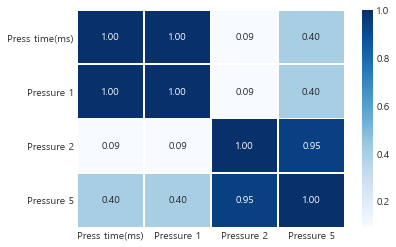

In [98]:
# 상관관계 
# pressure 2,5의 상관관계가 높음 
# pressure time, pressure 1의 상관관계가 높음 

sns.heatmap(data = raw_data.corr(), annot =True, fmt ='.2f', linewidths =.5, cmap ='Blues')
plt.show()

<Figure size 504x360 with 0 Axes>

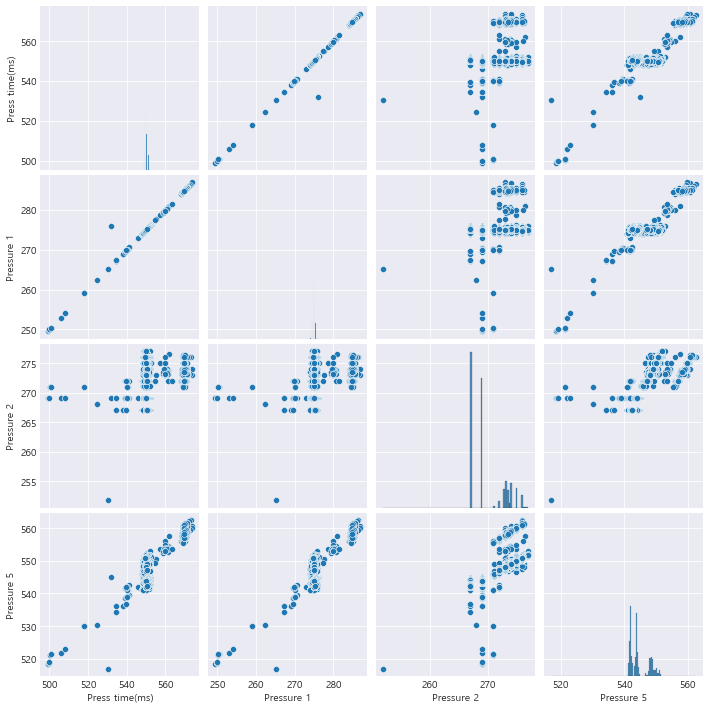

In [10]:
plt.figure(figsize=(7,5))
sns.pairplot(raw_data, palette='husl') 

In [11]:
raw_data.columns

Index(['working time', 'Press time(ms)', 'Pressure 1', 'Pressure 2',
       'Pressure 5'],
      dtype='object')

2. 날짜 데이터 전처리('2020-05-04', '2020-05-29' -> 특정 기간 추출)

In [94]:
time = []
for i in raw_data['working time']:
    j = str(i).replace(' 00:00:00','')
    time.append(j)
time[0]

'2020-05-04'

In [95]:
raw_data['working time'] = time
raw_data['working time']

0        2020-05-04
1        2020-05-04
2        2020-05-04
3        2020-05-04
4        2020-05-04
            ...    
64354    2020-05-29
64355    2020-05-29
64356    2020-05-29
64357    2020-05-29
64358    2020-05-29
Name: working time, Length: 64359, dtype: object

In [16]:
# 날짜 데이터 특정 기간만 추출할 필요가 있다는 것을 알겠군! 
raw_data['working time'].unique()

array(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-18', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-25', '2020-05-26', '00:00:00', '2138-06-15',
       '2197-06-24', '2256-07-04', '2315-07-15', '2374-07-24',
       '2433-08-02', '2492-08-11', '2551-08-22', '2610-09-01',
       '2669-09-10', '2728-09-20', '2787-09-30', '2846-10-09',
       '2905-10-19', '2964-10-28', '3023-11-08', '3082-11-17',
       '3141-11-27', '3200-12-06', '3259-12-16', '3318-12-26',
       '3378-01-04', '3437-01-14', '3496-01-24', '3555-02-03',
       '3614-02-12', '3673-02-21', '3732-03-03', '3791-03-13',
       '3850-03-23', '3909-04-02', '3968-04-11', '4027-04-21',
       '4086-04-30', '4145-05-10', '4204-05-20', '4263-05-30',
       '4322-06-09', '4381-06-18', '4440-06-27', '4499-07-07',
       '4558-07-17', '4617-07-27', '4676-08-05', '4735-08-16',
       '4794-08-25', '4853-09-03', '4912-09

In [87]:
# sol1) 특정 기간의 데이터 추출하기 
# new_data_1 = raw_data.loc[raw_data["working time"].between('2020-05-04', '2020-05-29')]
# new_data_1['working time'].unique()

array(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-18', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-25', '2020-05-26', '2020-05-27',
       '2020-05-28', '2020-05-29'], dtype=object)

In [18]:
# sol2) 특정 기간의 데이터 추출하기 -> object type 일때 사용 -> 위의 결과랑 동일하게 추출 
new_data = raw_data[(raw_data["working time"] >= '2020-05-04') & (raw_data["working time"] <= '2020-05-29')]
new_data['working time'].unique()

array(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-18', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-25', '2020-05-26', '2020-05-27',
       '2020-05-28', '2020-05-29'], dtype=object)

In [19]:
numerical_feature = ['Press time(ms)', 'Pressure 1', 'Pressure 2','Pressure 5']

3. working time과 'Press time(ms)', 'Pressure 1', 'Pressure 2','Pressure 5'의 관계 시각화 - 선그래프

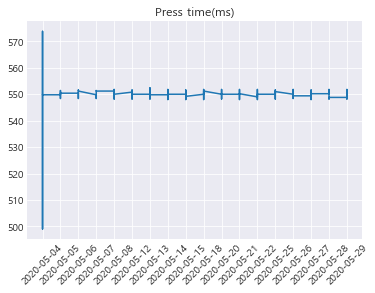

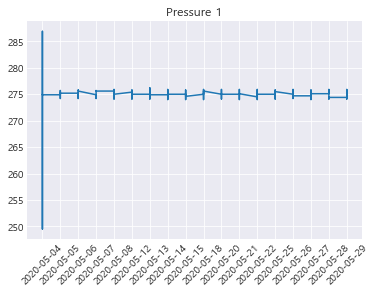

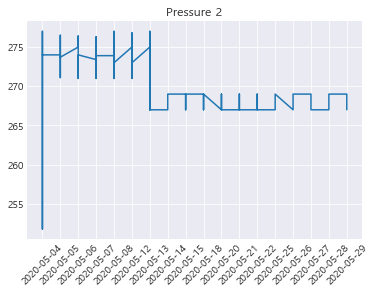

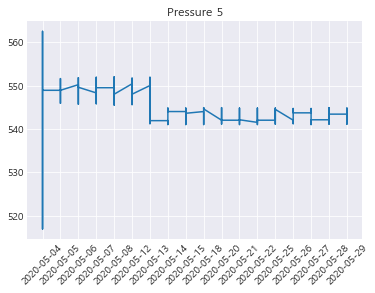

In [23]:
# x라는 시간축(wroking time)에 따라 y라는 pressure time, pressure 1,2,3의 값이 어떻게 변화하는지 살펴보기 
# 왜 press time과 pressure 1의 상관관계가 높은지 / pressure 2와 pressure 5의 상관관계가 높은지 확인 가능 
for col in numerical_feature:
    plt.plot(new_data['working time'].values, new_data[col].values)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

4. working time과 'Press time(ms)', 'Pressure 1', 'Pressure 2','Pressure 5'의 관계 시각화 - 히스토그램

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


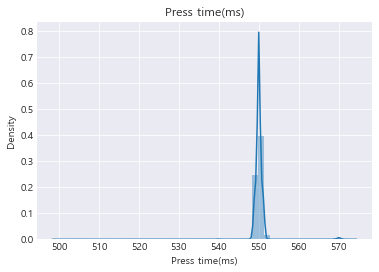

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


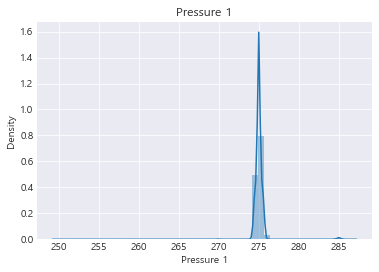

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


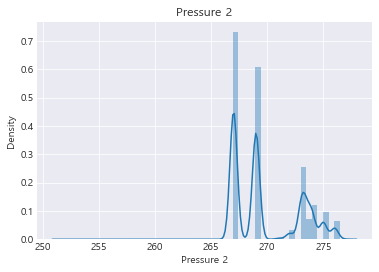

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


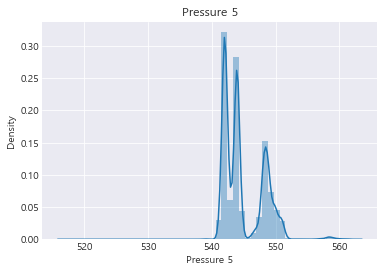

In [24]:
# 분포, 밀도를 살펴보기위한 histogram 살펴보기 
for col in numerical_feature:
    sns.distplot(new_data[col])
    plt.title(col)
    plt.show()

5. working time과 'Press time(ms)', 'Pressure 1', 'Pressure 2','Pressure 5'의 관계 시각화 - bar그래프

In [103]:
press_hist = new_data.drop(['working time'], axis=1)

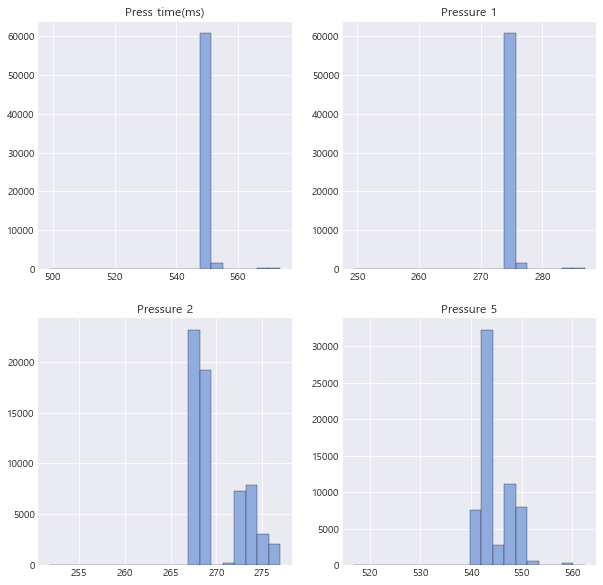

In [105]:
plt.figure(figsize = (10,10))

# 각 변수의 막대그래프 개수 
bin = [20,20,20,20] 

for index, value in enumerate(press_hist):
    sub = plt.subplot(2,2,index +1) 
    sub.hist(press_hist[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)

6. working time과 'Press time(ms)', 'Pressure 1', 'Pressure 2','Pressure 5'의 관계 시각화 - baxplot 그래프

<AxesSubplot:>

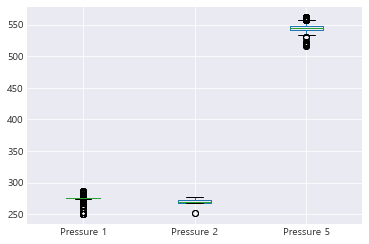

In [107]:
# boxplot 살펴보기 
new_data[['Pressure 1','Pressure 2','Pressure 5']].plot(kind='box')

<AxesSubplot:>

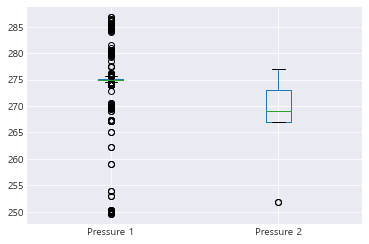

In [108]:
new_data[['Pressure 1','Pressure 2']].plot(kind='box')

<AxesSubplot:>

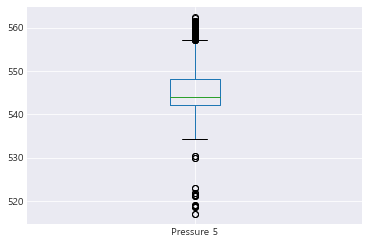

In [109]:
new_data['Pressure 5'].plot(kind='box')

# 2. Error Data

1. 데이터리딩 및 피쳐 분석 

In [31]:
error_data = pd.read_excel('./Press_error.xlsx')
error_data.head()

,idx,Machine_Name,Item No,working time,defect,defect type,Unnamed: 6
0,1,Press-01,ED5260,2020-05-04,0,1,주름발생
1,2,Press-01,ED5260,2020-05-04,1,2,터짐발생
2,3,Press-01,ED5260,2020-05-04,0,3,버 발생
3,4,Press-02,ED5260,2020-05-05,1,1,NaN
4,5,Press-03,ED5260,2020-05-05,1,2,NaN


In [44]:
error_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   idx           57 non-null     int64         
 1   Machine_Name  57 non-null     object        
 2   Item No       57 non-null     object        
 3   working time  57 non-null     datetime64[ns]
 4   defect        57 non-null     int64         
 5   defect type   57 non-null     int64         
 6   Unnamed: 6    3 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.2+ KB


In [118]:
# 기존 press 데이터와 달리, press기의 종류가 다양
# press기기별 defect 타입의 종류 
a = error_data.groupby(['Machine_Name', 'defect type']).sum()
del a['idx']
a

defect
Machine_Name defect type        
Press-01     1                 0
             2                 1
             3                 0
Press-02     1                 1
Press-03     2                 1
Press-04     3                 0
Press-05     1                 1
Press-06     2                 0
Press-07     3                 0
Press-08     1                 0
Press-09     2                 0
Press-10     3                 1
Press-11     1                 2
Press-12     2                 1
Press-13     3                 0
Press-14     1                 1
Press-15     2                 2
Press-16     3                 1
Press-17     1                 4
Press-18     2                 0
Press-19     3                 0
Press-20     1                 1
Press-21     2                 0
Press-22     3                 1
Press-23     1                 3
Press-24     2                 1
Press-25     3                 0
Press-26     1                 0
Press-27     2                 2
Press-28     3                 0
Press-29     1                 2
Press-30     2                 1
Press-31     3                 0
Press-32     1                 3
Press-33     2                 1
Press-34     3                 1
Press-35     1                 1
Press-36     2                 0
Press-37     3                 1
Press-38     1                 0
Press-39     2                 1
Press-40     3                 2
Press-41     1                 0
Press-42     2                 0
Press-43     3                 0
Press-44     1                 0
Press-45     2                 2
Press-46     3                 1
Press-47     1                 5
Press-48     2                 2
Press-49     3                 1
Press-50     1                 2
Press-51     2                 3
Press-52     3                 0
Press-53     1                 3
Press-54     2                 5
Press-55     3                 2

In [112]:
# 날짜별 불량 타입 갯수 파악 
error_data.groupby(['working time', 'defect type']).sum()

idx  defect
working time defect type             
2020-05-04   1              1       0
             2              2       1
             3              3       0
2020-05-05   1              4       1
             2              5       1
             3              6       0
2020-05-06   1              7       1
             2              8       0
             3              9       0
2020-05-07   1             10       0
             2             11       0
             3             12       1
2020-05-08   1             13       2
             2             14       1
             3             15       0
2020-05-12   1             16       1
             2             17       2
             3             18       1
2020-05-13   1             19       4
             2             20       0
             3             21       0
2020-05-14   1             22       1
             2             23       0
             3             24       1
2020-05-15   1             25       3
             2             26       1
             3             27       0
2020-05-18   1             28       0
             2             29       2
             3             30       0
2020-05-19   1             31       2
             2             32       1
             3             33       0
2020-05-20   1             34       3
             2             35       1
             3             36       1
2020-05-21   1             37       1
             2             38       0
             3             39       1
2020-05-22   1             40       0
             2             41       1
             3             42       2
2020-05-25   1             43       0
             2             44       0
             3             45       0
2020-05-26   1             46       0
             2             47       2
             3             48       1
2020-05-27   1             49       5
             2             50       2
             3             51       1
2020-05-28   1             52       2
             2             53       3
             3             54       0
2020-05-29   1             55       3
             2             56       5
             3             57       2

In [114]:
error_data.groupby('defect type')['defect'].sum()

defect type
1    29
2    23
3    11
Name: defect, dtype: int64

In [39]:
error_data['Item No'].unique()

array(['ED5260'], dtype=object)

In [47]:
error_data['defect'].value_counts() # 불량품의 갯수

0    22
1    19
2     9
3     4
5     2
4     1
Name: defect, dtype: int64

In [48]:
error_data['defect type'].value_counts() # 불량의 type

1    19
2    19
3    19
Name: defect type, dtype: int64

In [119]:
error = error_data.drop(columns=['idx','Item No','Unnamed: 6'],axis=1)
error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Machine_Name  57 non-null     object        
 1   working time  57 non-null     datetime64[ns]
 2   defect        57 non-null     int64         
 3   defect type   57 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.9+ KB


In [120]:
# 위의 데이터셋의 시간과 다름 -> 논의해야할 내용 
error['working time'].unique()

array(['2020-05-04T00:00:00.000000000', '2020-05-05T00:00:00.000000000',
       '2020-05-06T00:00:00.000000000', '2020-05-07T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-05-12T00:00:00.000000000',
       '2020-05-13T00:00:00.000000000', '2020-05-14T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-20T00:00:00.000000000',
       '2020-05-21T00:00:00.000000000', '2020-05-22T00:00:00.000000000',
       '2020-05-25T00:00:00.000000000', '2020-05-26T00:00:00.000000000',
       '2020-05-27T00:00:00.000000000', '2020-05-28T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [35]:
# 이미 datetime의 type이기 때문에 할 필요 x 
# error['working time'] = pd.to_datetime(error['working time'])

2. working time과 defect의 총합의 관계 시각화 - line 그래프

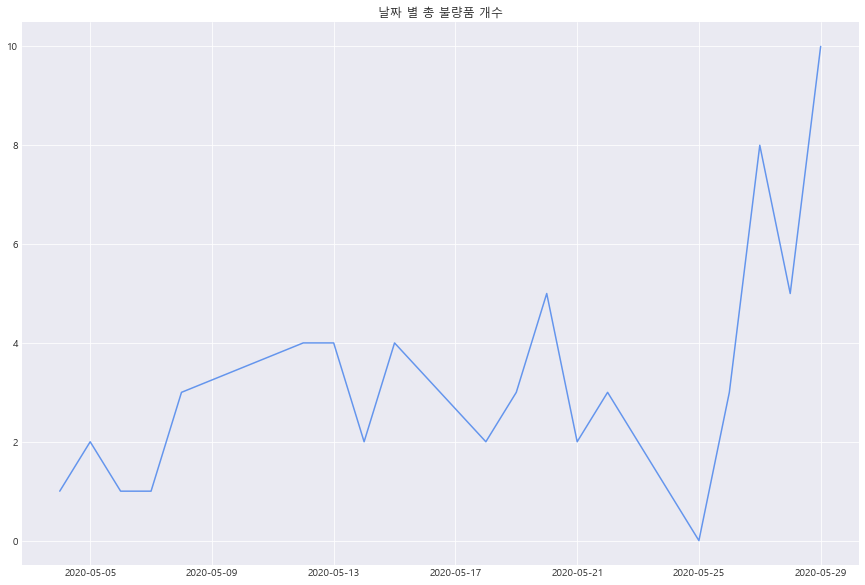

In [121]:
# 5월 29일에 불량품 갯수가 가장 많음 
# 선 그래프 

x = error['working time'].unique()
y = error['defect'].groupby(error['working time']).sum() # working time 별로 defect의 갯수의 합 
plt.figure(figsize=(15,10))
plt.plot(x,y, color='cornflowerblue')
plt.title('날짜 별 총 불량품 개수')
plt.show()

3. working time과 defect의 총합의 관계 시각화 - bar 그래프

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


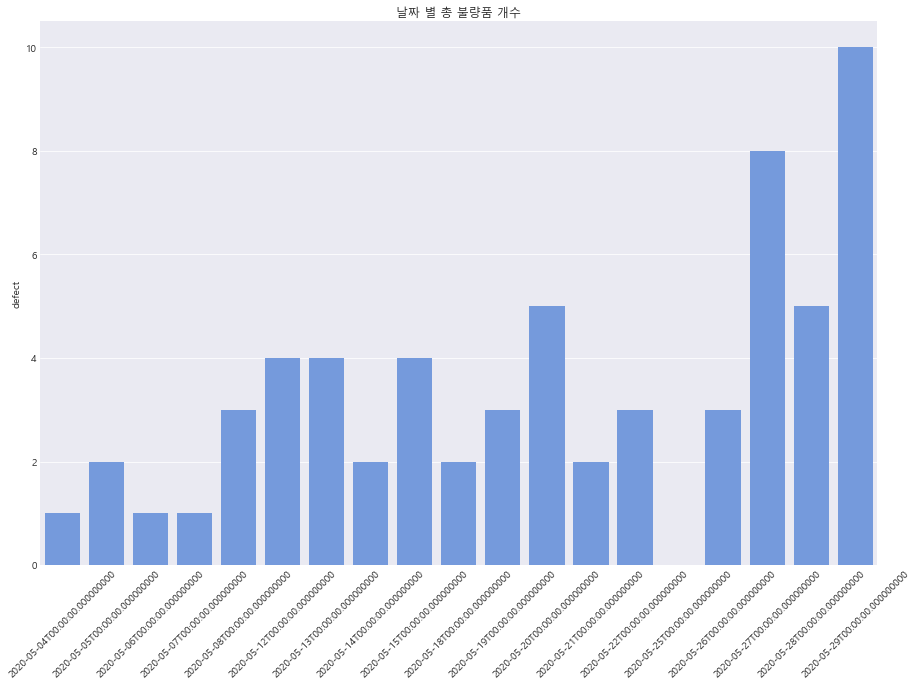

In [69]:
# barplot -> 막대그래프 

x = error['working time'].unique()
y = error['defect'].groupby(error['working time']).sum()
plt.figure(figsize=(15,10))
sns.barplot(x,y, color='cornflowerblue')
plt.title('날짜 별 총 불량품 개수')
plt.xticks(rotation = 45)
plt.show()

4. machine name과 defect의 총합의 관계 시각화 - bar 그래프

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


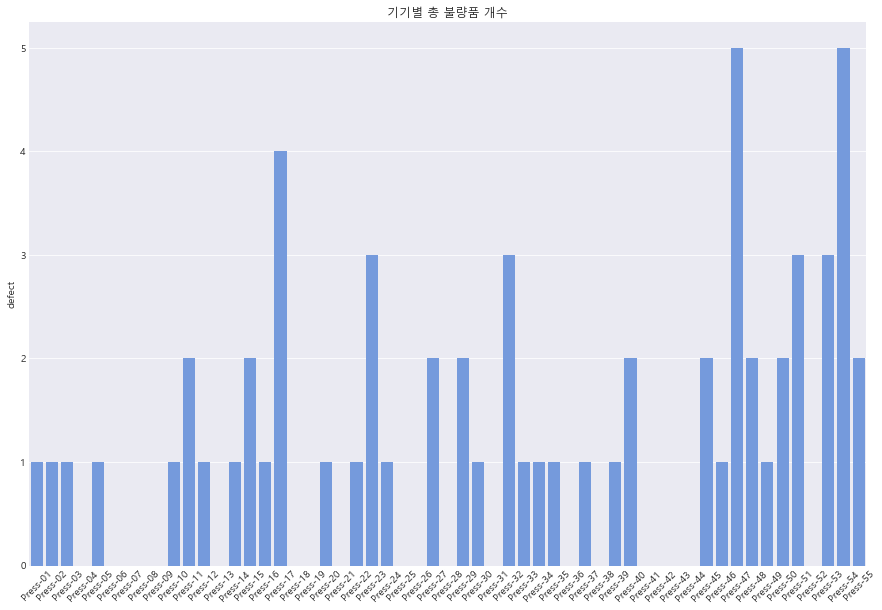

In [123]:
# barplot -> 막대그래프

x = error['Machine_Name'].unique()
y = error['defect'].groupby(error['Machine_Name']).sum()
plt.figure(figsize=(15,10))
sns.barplot(x,y, color='cornflowerblue')
plt.title('기기별 총 불량품 개수')
plt.xticks(rotation = 45)
plt.show()

5. machine name과 각각의 defect type의 관계 시각화 - bar 그래프

C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


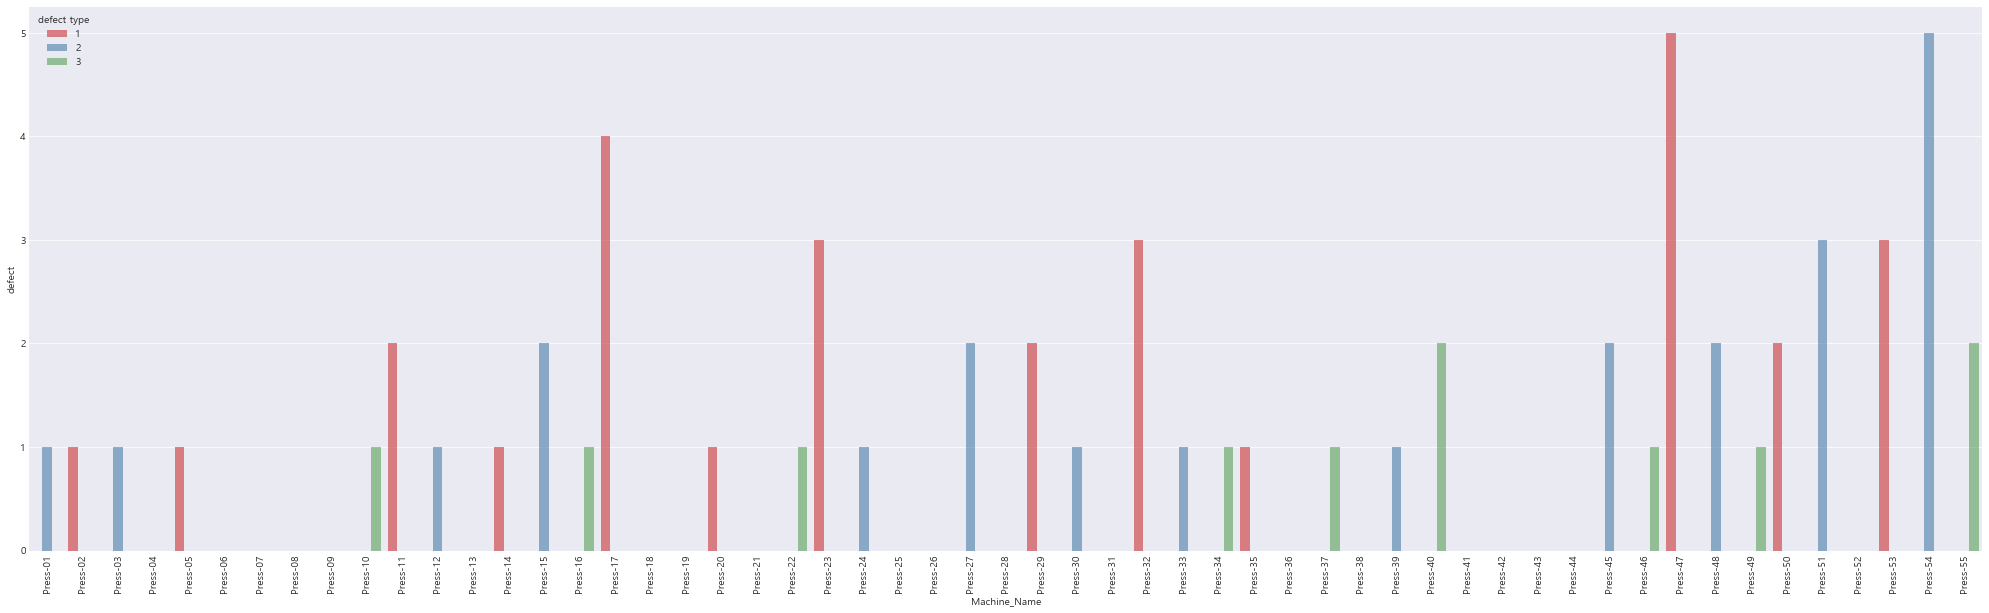

In [124]:
# 기기별 불량 타입 

plt.figure(figsize=(35,10))
sns.barplot(error['Machine_Name'], error['defect'],hue=error['defect type'],palette= 'Set1' ,alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

6. 불량유형 별 총 불량품 개수 시각화 - bar 그래프

defect type
1    29
2    23
3    11
Name: defect, dtype: int64


C:\Users\wlsdl\anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


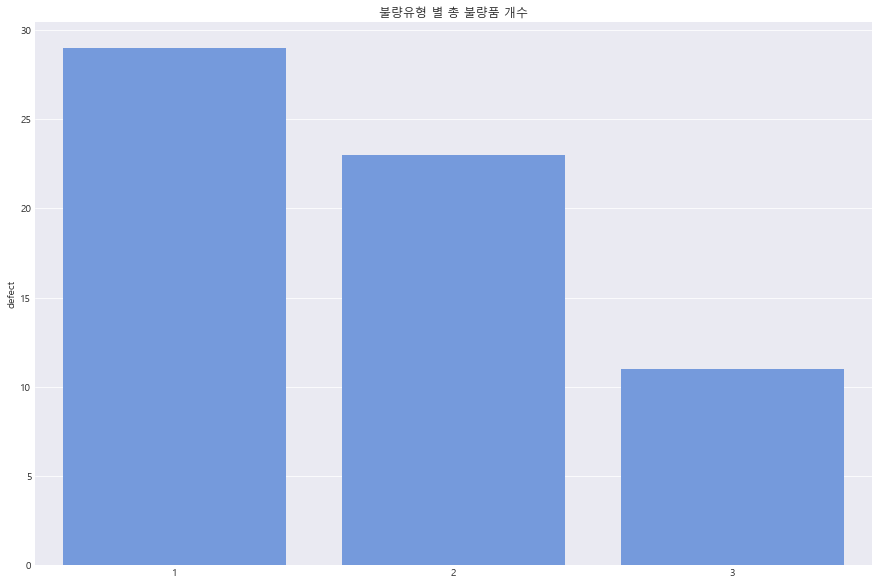

In [81]:
x = error['defect type'].unique()
y = error['defect'].groupby(error['defect type']).sum()
print(y)
plt.figure(figsize=(15,10))
sns.barplot(x,y, color='cornflowerblue')
plt.title('불량유형 별 총 불량품 개수')
plt.show()